In [5]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import types
from botocore.client import Config
import ibm_boto3
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [9]:
def __iter__(self): return 0

client_3b08f636aa4c4bc58b03e36105622462 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='EI06iPS11MRoHQiLAPwMFIukCpW_Yx5PqbVhI0FSYqjZ',
    ibm_auth_endpoint="https://iam.eu-de.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

def get_df(key):
    body = client_3b08f636aa4c4bc58b03e36105622462.get_object(Bucket='courserabadges-donotdelete-pr-72y9f6bzbckngj',Key=key)['Body']
    # add missing __iter__ method, so pandas accepts body as file-like object
    if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body)
    df = pd.read_csv(body)
    if 'Unnamed: 0' in df.columns:
        df.drop(columns=['Unnamed: 0'], inplace=True)
    return df

df_apple = get_df(key='AppleNewsStock.csv')
df_msft = get_df(key='MicrosoftNewsStock.csv')

In [10]:
df_apple.head()

,Date,Open,High,Low,Close,Adj Close,Volume,News
0,2006-12-01,13.114285,13.190000,12.871428,91.320000,13.045714,198769900,WHAT'S ON TONIGHT : 8 P.M. (TLC) ASHLEY JUDD A...
1,2006-12-04,13.125714,13.150000,12.928572,91.120003,13.017143,177384200,More on Housing Prices : The broadest governme...
2,2006-12-05,13.092857,13.190000,12.981428,91.269997,13.038571,165709600,NaN
3,2006-12-06,12.948571,13.055715,12.810000,89.830002,12.832857,159546100,Honoring R.W. Apple in Words and Food : About ...
4,2006-12-07,12.861428,12.928572,12.414286,87.040001,12.434286,251206900,"Homebuilders, and Worries Over Jobs, Lead a De..."


In [11]:
df_msft.head()

,Date,Open,High,Low,Close,Adj Close,Volume,News
0,2006-12-01,29.230000,29.299999,28.900000,29.120001,29.120001,72257000,NaN
1,2006-12-04,29.230000,29.520000,29.170000,29.330000,29.330000,55123400,The Retooling of a Search Engine : Ask.com is ...
2,2006-12-05,29.360001,29.400000,29.030001,29.129999,29.129999,45606000,NaN
3,2006-12-06,29.100000,29.129999,28.870001,28.990000,28.990000,48564100,Combat as Usual? Not With These Games : A few ...
4,2006-12-07,28.959999,29.070000,28.809999,28.850000,28.850000,46831100,Vista Is Ready. Are You? : Why it might be a b...


In [13]:
df_apple.shape, df_msft.shape

((2517, 8), (2517, 8))

In [39]:
def get_nan_share(feature): return round(feature.isnull().sum()/feature.isnull().count(),3)
get_nan_share(feature=df_apple.News), get_nan_share(feature=df_msft.News)

(0.077, 0.467)

In [45]:
# time period
df_apple.Date.min(), df_apple.Date.max()

('2006-12-01', '2016-11-30')

In [51]:
# not very day included, probably due to weekends and holidays (-> no trading)
df_apple.Date.head(10)

0    2006-12-01
1    2006-12-04
2    2006-12-05
3    2006-12-06
4    2006-12-07
5    2006-12-08
6    2006-12-11
7    2006-12-12
8    2006-12-13
9    2006-12-14
Name: Date, dtype: object

In [47]:
df_apple.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2.517000e+03
mean,60.719774,61.302098,60.065740,260.556404,60.695236,1.345639e+08
std,36.218609,36.482248,35.930683,175.576176,36.204898,9.904975e+07
min,11.164286,11.607142,10.967143,78.199997,11.171429,1.147590e+07
25%,25.577143,25.857143,25.049999,112.879997,25.540001,6.363350e+07
50%,57.142857,57.655716,56.480000,179.300003,57.104286,1.077881e+08
75%,93.790001,94.639999,92.680000,400.289978,93.699997,1.774899e+08
max,134.460007,134.539993,131.399994,702.100037,133.000000,8.432424e+08


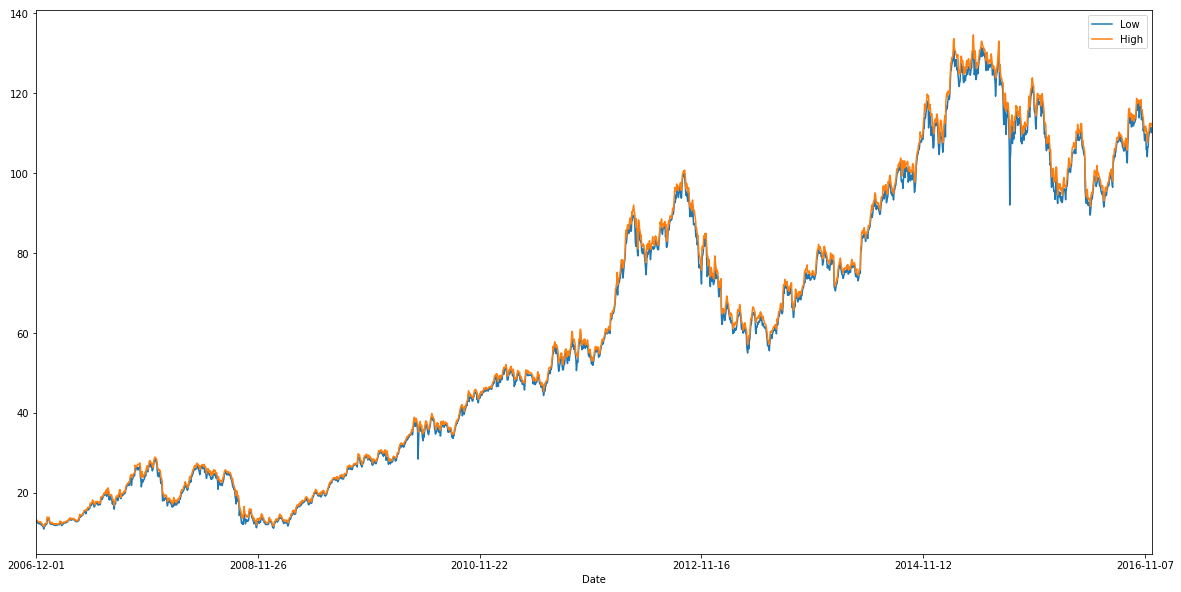

In [65]:
df_apple.set_index(df_apple['Date'], drop=False)[['Low', 'High']].plot(figsize=(20,10))

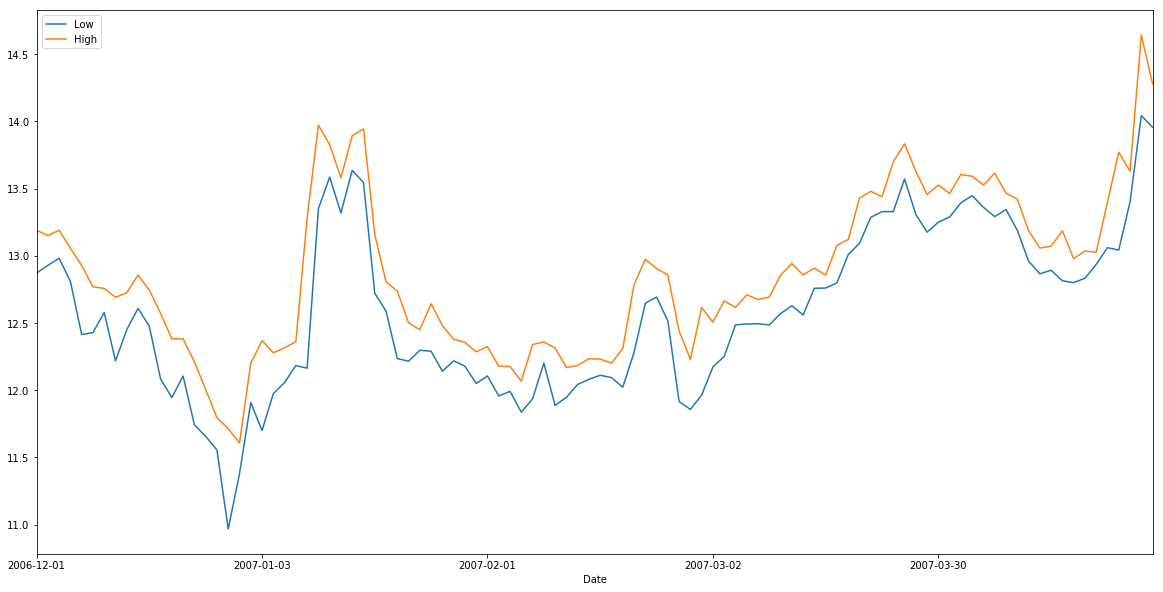

In [68]:
df_apple.set_index(df_apple['Date'], drop=False)[['Low', 'High']].head(100).plot(figsize=(20,10))

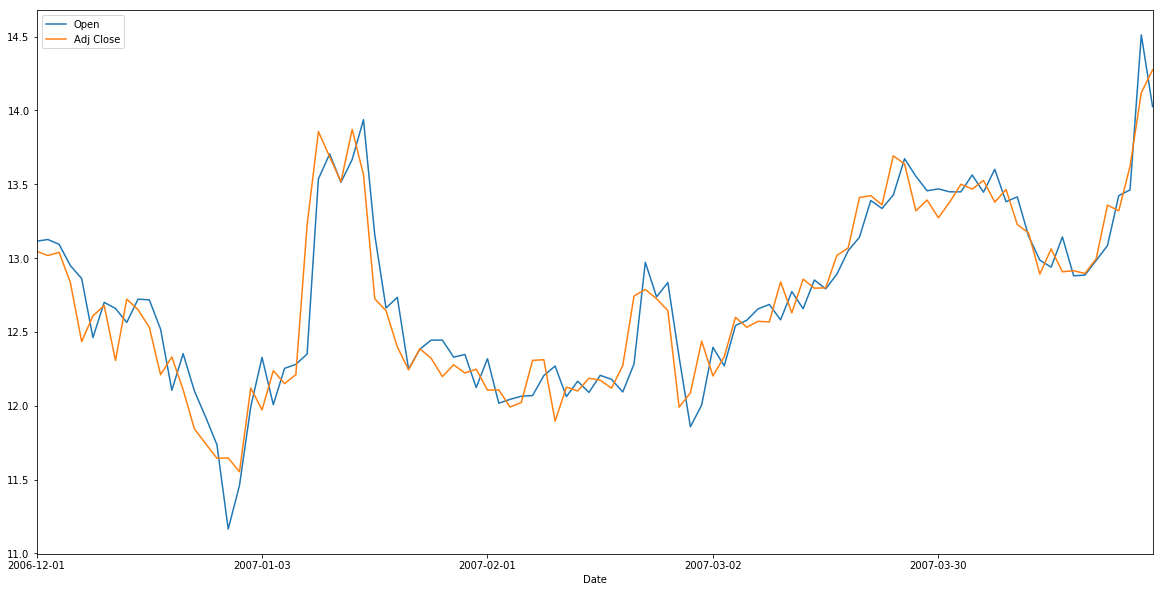

In [69]:
df_apple.set_index(df_apple['Date'], drop=False)[['Open', 'Adj Close']].head(100).plot(figsize=(20,10))

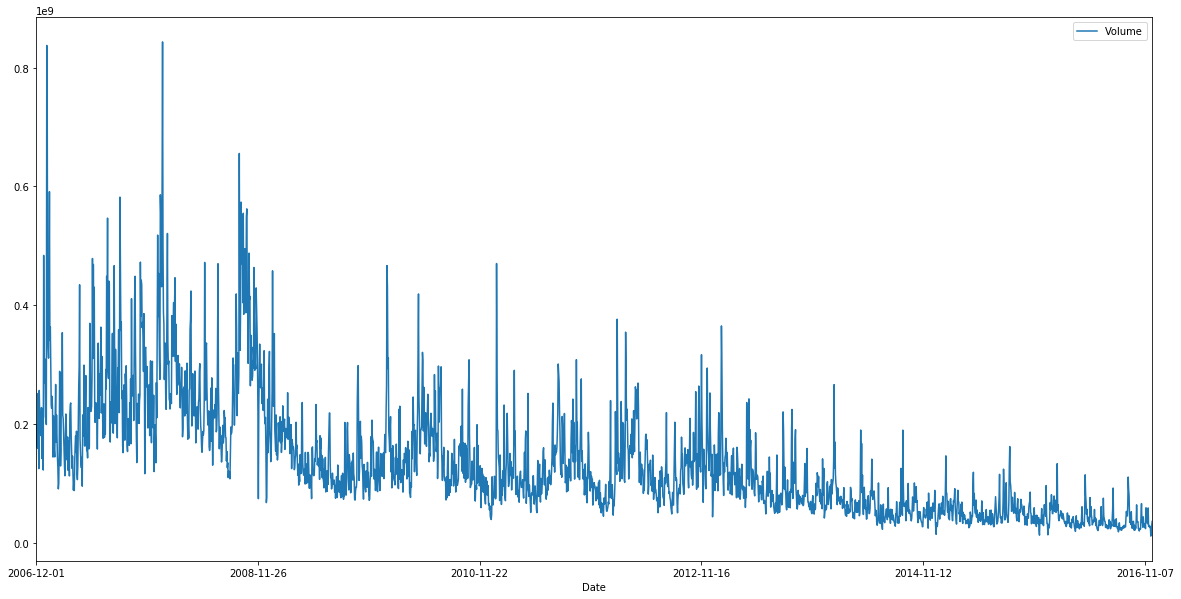

In [71]:
df_apple.set_index(df_apple['Date'], drop=False)[['Volume']].plot(figsize=(20,10))

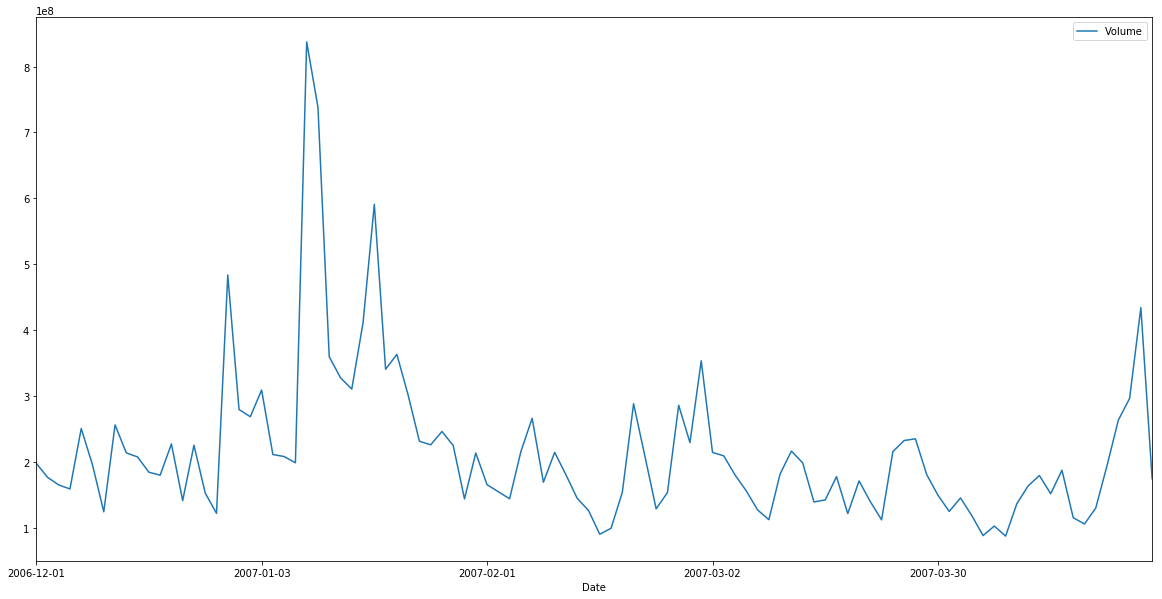

In [72]:
df_apple.set_index(df_apple['Date'], drop=False)[['Volume']].head(100).plot(figsize=(20,10))

In [76]:
df_apple.News[3]

"Honoring R.W. Apple in Words and Food : About 1,000 of R.W. Apple’s admirers turned out for a funny, sad and immensely caloric tribute to The New York Times writer at the Kennedy Center memorial on Tuesday.Bono's Elevation Seeks Time's Parenting Titles, Report Says : On the heels of news that the auction for Time Inc.'s Time4Media publications had stalled, the New York Post reported that Elevation Partners, the private equity group founded by philanthropist and sometime rocker Bono, has entered the fray. The b...Defense Nominee Gains Approval of Senate Panel : Robert M. Gates said the recommendations to be made public this morning by the Iraq Study Group would be important but not “the last word.”"

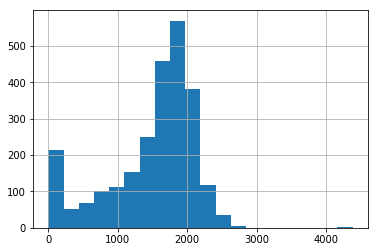

In [90]:
df_apple['NewsLength'] = df_apple.News.str.len().fillna(0)
df_apple['NewsLength'].hist(bins = 20)

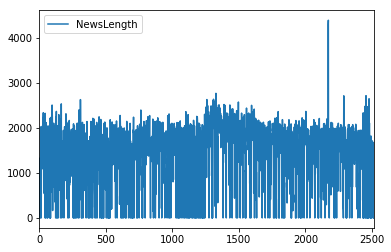

In [92]:
df_apple[['NewsLength']].plot()

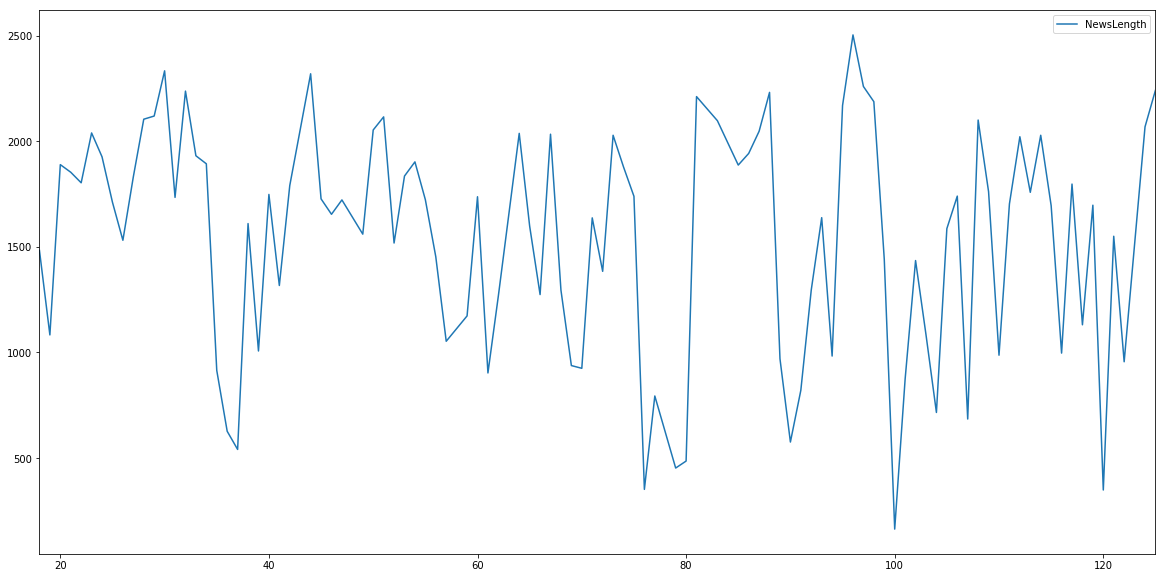

In [190]:
df_apple[['NewsLength']].head(100).plot(figsize=(20,10))

In [95]:
df_apple[['NewsLength', 'Adj Close']].corr()

,NewsLength,Adj Close
NewsLength,1.000000,0.119569
Adj Close,0.119569,1.000000


In [126]:
# sentiment 
# --- nlp preprocessing missing here ---
def get_sentiment(news):
    analyser = SentimentIntensityAnalyzer()
    news = news.fillna('')
    sentiment = news.apply(lambda x: analyser.polarity_scores(x)).tolist()
    df_sentiment = pd.DataFrame(sentiment, columns=['neg','neu', 'pos', 'compound'])
    return df_sentiment

df_sentiment = get_sentiment(news=df_apple.News)
df_apple = pd.concat([df_apple, df_sentiment], axis = 1)

In [127]:
df_apple.head()

,Date,Open,High,Low,Close,Adj Close,Volume,News,NewsLength,sentiment,Sentiment,neg,neu,pos,compound
0,2006-12-01,13.114285,13.190000,12.871428,91.320000,13.045714,198769900,WHAT'S ON TONIGHT : 8 P.M. (TLC) ASHLEY JUDD A...,1319.0,0.7707,0.7707,0.032,0.905,0.063,0.7707
1,2006-12-04,13.125714,13.150000,12.928572,91.120003,13.017143,177384200,More on Housing Prices : The broadest governme...,789.0,0.8720,0.8720,0.011,0.904,0.085,0.8720
2,2006-12-05,13.092857,13.190000,12.981428,91.269997,13.038571,165709600,NaN,0.0,0.0000,0.0000,0.000,0.000,0.000,0.0000
3,2006-12-06,12.948571,13.055715,12.810000,89.830002,12.832857,159546100,Honoring R.W. Apple in Words and Food : About ...,706.0,0.6858,0.6858,0.029,0.878,0.093,0.6858
4,2006-12-07,12.861428,12.928572,12.414286,87.040001,12.434286,251206900,"Homebuilders, and Worries Over Jobs, Lead a De...",593.0,-0.6712,-0.6712,0.091,0.869,0.040,-0.6712


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc74b346c18>]],
      dtype=object)

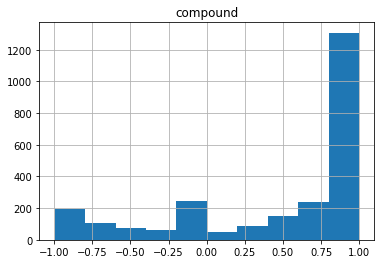

In [134]:
df_apple[['compound']].hist()

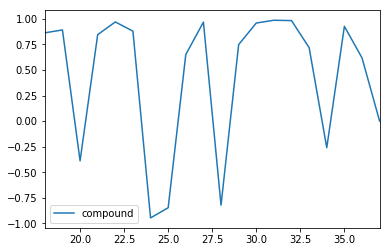

In [192]:
df_apple[['compound']].head(20).plot()

In [136]:
df_apple[['pos','neu','neg', 'compound','Adj Close']].corr()

,pos,neu,neg,compound,Adj Close
pos,1.000000,0.438137,0.155837,0.565060,0.026172
neu,0.438137,1.000000,0.263576,0.223225,0.018164
neg,0.155837,0.263576,1.000000,-0.497096,0.023859
compound,0.565060,0.223225,-0.497096,1.000000,0.009836
Adj Close,0.026172,0.018164,0.023859,0.009836,1.000000


In [ ]:
df_apple['daily_return'] = df_apple['Adj Close']

In [148]:
df_apple['adj_close_lag1'] = df_apple['Adj Close'].shift(1)
df_apple['compound_lag1'] = df_apple['compound'].shift(1)
df_apple = df_apple.dropna()

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [149]:
df_apple.head()

,Date,Open,High,Low,Close,Adj Close,Volume,News,NewsLength,sentiment,Sentiment,neg,neu,pos,compound,adj_close_lag1,compound_lag1
3,2006-12-06,12.948571,13.055715,12.810000,89.830002,12.832857,159546100,Honoring R.W. Apple in Words and Food : About ...,706.0,0.6858,0.6858,0.029,0.878,0.093,0.6858,13.017143,0.8720
4,2006-12-07,12.861428,12.928572,12.414286,87.040001,12.434286,251206900,"Homebuilders, and Worries Over Jobs, Lead a De...",593.0,-0.6712,-0.6712,0.091,0.869,0.040,-0.6712,12.832857,0.6858
5,2006-12-08,12.461429,12.770000,12.428572,88.259995,12.608571,196069300,"Homebuilders, and Worries Over Jobs, Lead a De...",729.0,-0.1796,-0.1796,0.084,0.848,0.069,-0.1796,12.434286,-0.6712
6,2006-12-11,12.700000,12.757143,12.578571,88.750000,12.678572,124945100,Sales of iPods and iTunes Not Much in Sync : T...,927.0,-0.8743,-0.8743,0.105,0.852,0.042,-0.8743,12.608571,-0.1796
8,2006-12-13,12.564285,12.724286,12.450000,89.050003,12.721429,214263000,Op-Art; iDentities : Op-Art by Seymour Chwast ...,1298.0,0.9360,0.9360,0.018,0.900,0.082,0.9360,12.678572,-0.8743


In [151]:
df_apple[['compound_lag1','adj_close_lag1','Adj Close']].corr()

,compound_lag1,adj_close_lag1,Adj Close
compound_lag1,1.000000,0.006600,0.005952
adj_close_lag1,0.006600,1.000000,0.999444
Adj Close,0.005952,0.999444,1.000000


In [171]:
df_apple['comp_window10'] = df_apple['compound'].rolling(window=10).mean()
df_apple = df_apple.dropna()

In [178]:
df_apple['daily_return'] = df_apple['Adj Close'] - df_apple['adj_close_lag1']

In [173]:
df_apple[['compound_lag1', 'comp_window5', 'comp_window10','Adj Close']].corr()

,compound_lag1,comp_window5,comp_window10,Adj Close
compound_lag1,1.000000,0.494729,0.346385,0.000144
comp_window5,0.494729,1.000000,0.710785,0.003707
comp_window10,0.346385,0.710785,1.000000,0.010997
Adj Close,0.000144,0.003707,0.010997,1.000000


In [188]:
df_apple[['pos', 'compound', 'compound_lag1', 'daily_return']].corr()

,pos,compound,compound_lag1,daily_return
pos,1.000000,0.547980,0.087179,-0.002317
compound,0.547980,1.000000,0.107991,0.058267
compound_lag1,0.087179,0.107991,1.000000,-0.020006
daily_return,-0.002317,0.058267,-0.020006,1.000000


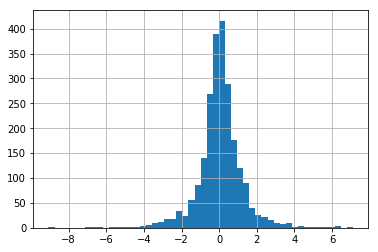

In [187]:
df_apple['daily_return'].hist(bins=50)

In [206]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_apple['adj_close_norm'] = scaler.fit_transform(np.array(df_apple['Adj Close']).reshape(-1,1))

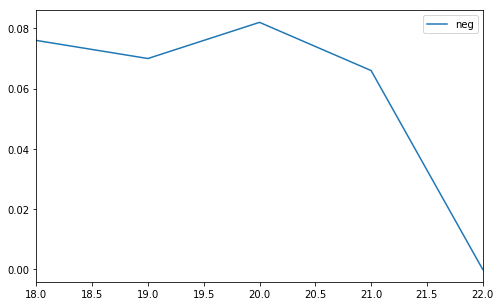

In [219]:
df_apple[['neg']].head(5).plot(figsize=(8,5))

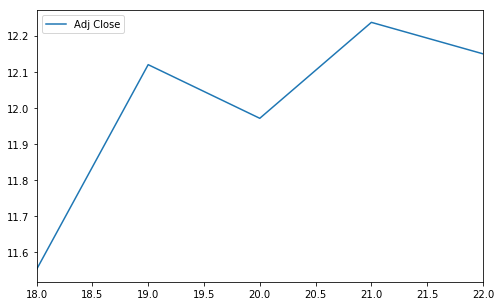

In [220]:
df_apple[['Adj Close']].head(5).plot(figsize=(8,5))